In [2]:
import cv2
img=cv2.imread('cat.jpg')

In [3]:
height,width,channels = img.shape
img.shape

(959, 640, 3)

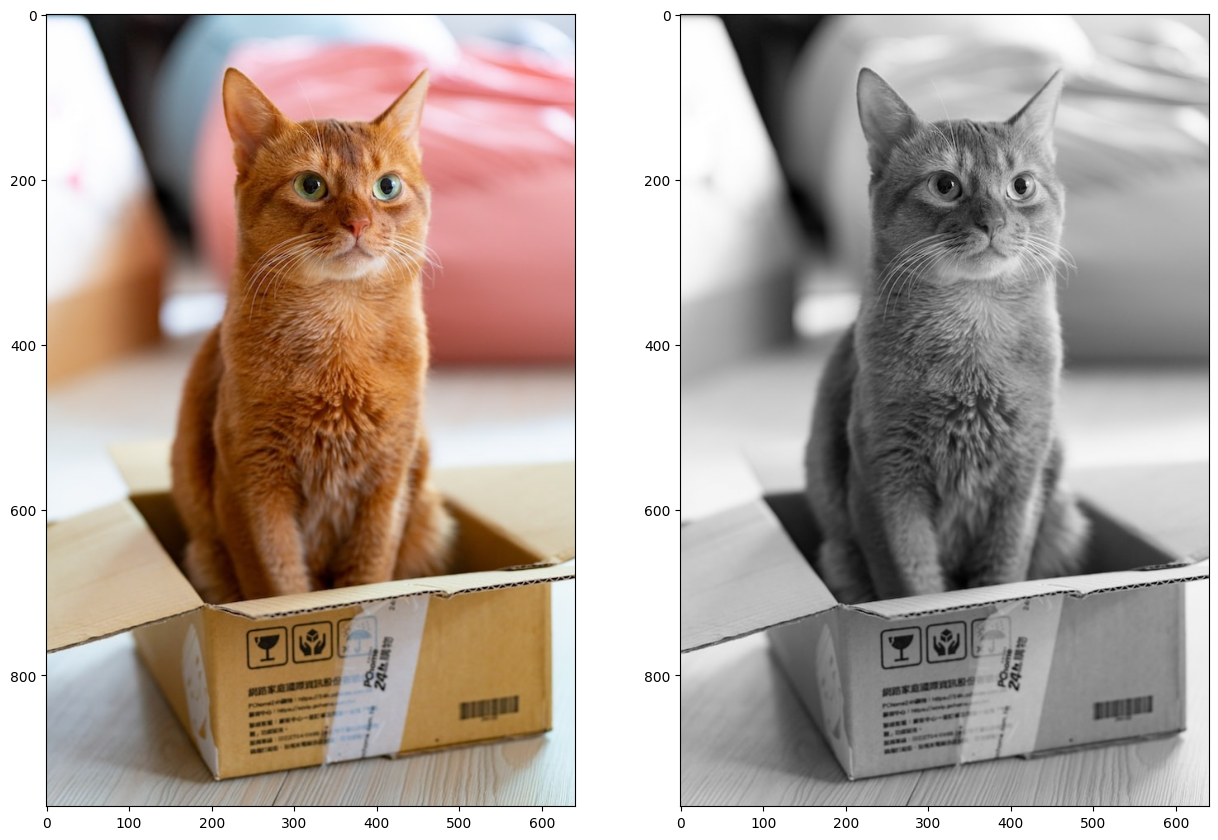

In [4]:
from matplotlib import pyplot as plt
color = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.rcParams['figure.figsize'] = [15,15]
fig, ax = plt.subplots(1,2)
#1,2 Specifies that the figure will contain 1 row anfd 2 colums
#this means you will display 2 images side by size
ax[0].imshow(color)
ax[1].imshow(gray,cmap='gray')

In [5]:
#resized view of image
resized = cv2.resize(color,(320,480))
resized.shape

(480, 320, 3)

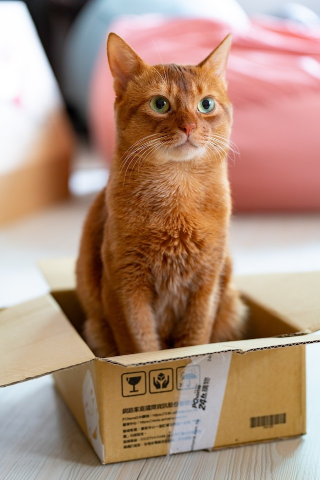

In [6]:
from PIL import Image
imgp = cv2.cvtColor(resized,cv2.COLOR_RGBA2RGB)
display(Image.fromarray(imgp))

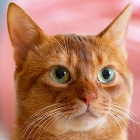

(140, 140, 3)

In [7]:
cropped=resized[30:170,100:240]
display(Image.fromarray(cropped))
cropped.shape

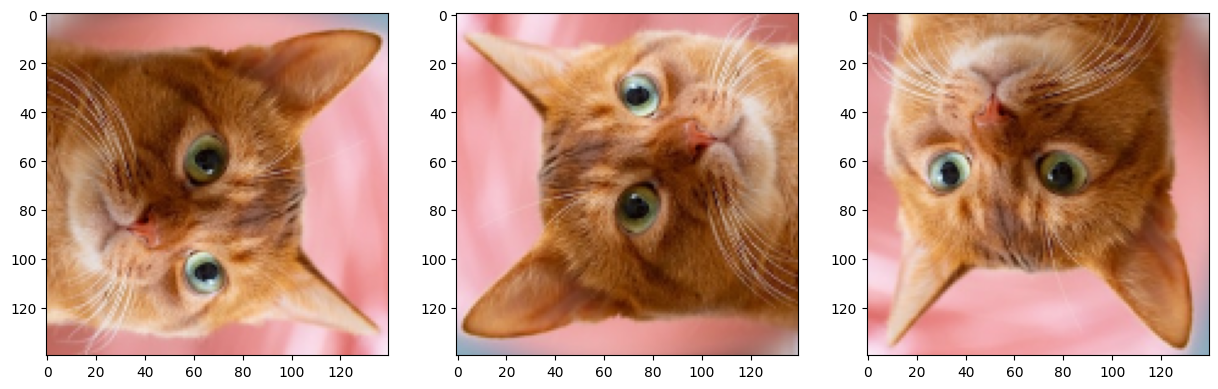

In [8]:
rotated90 = cv2.rotate(cropped,cv2.ROTATE_90_CLOCKWISE)
rotatedn90 = cv2.rotate(cropped,cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated180 = cv2.rotate(cropped,cv2.ROTATE_180)
fig, ax = plt.subplots(1, 3)
ax[0].imshow(rotated90)
ax[1].imshow(rotatedn90)
ax[2].imshow(rotated180)
plt.show()



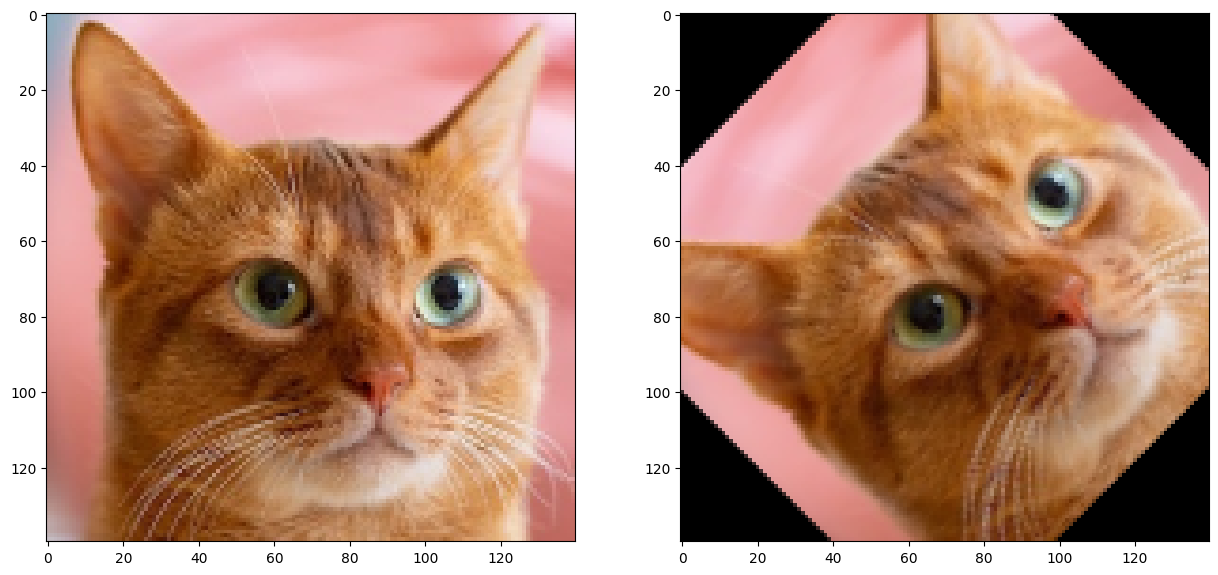

In [9]:
height,width=cropped.shape[:2]
center = (width/2,height/2)
rotate_matrix = cv2.getRotationMatrix2D(center=center,angle=45,scale=1)
rotated_image = cv2.warpAffine(src=cropped,M=rotate_matrix, dsize=(width,height))
fig,ax=plt.subplots(1,2)
ax[0].imshow(cropped)
ax[1].imshow(rotated_image)

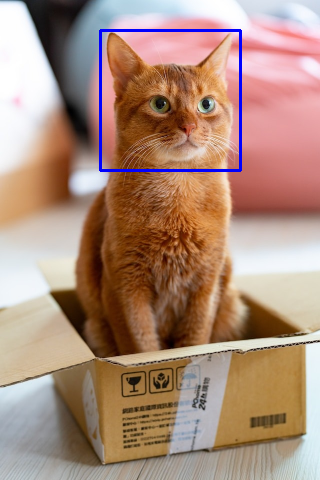

In [10]:
imgtoann = imgp.copy()
start_point = (100,30)
end_point= (240,170)
annot = cv2.rectangle(imgtoann,start_point,end_point,(0,0,255),thickness=2,lineType=cv2.LINE_8)
display(Image.fromarray(annot))

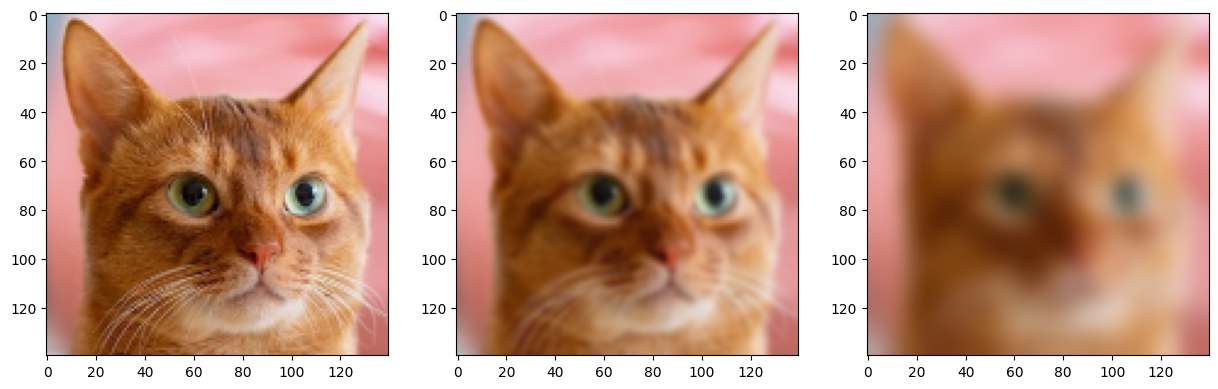

In [11]:
blur1 = cv2.GaussianBlur(cropped,(5,5),0)
blur2=cv2.GaussianBlur(cropped,(25,25),0)
fig,ax=plt.subplots(1,3)
ax[0].imshow(cropped)
ax[1].imshow(blur1)
ax[2].imshow(blur2)

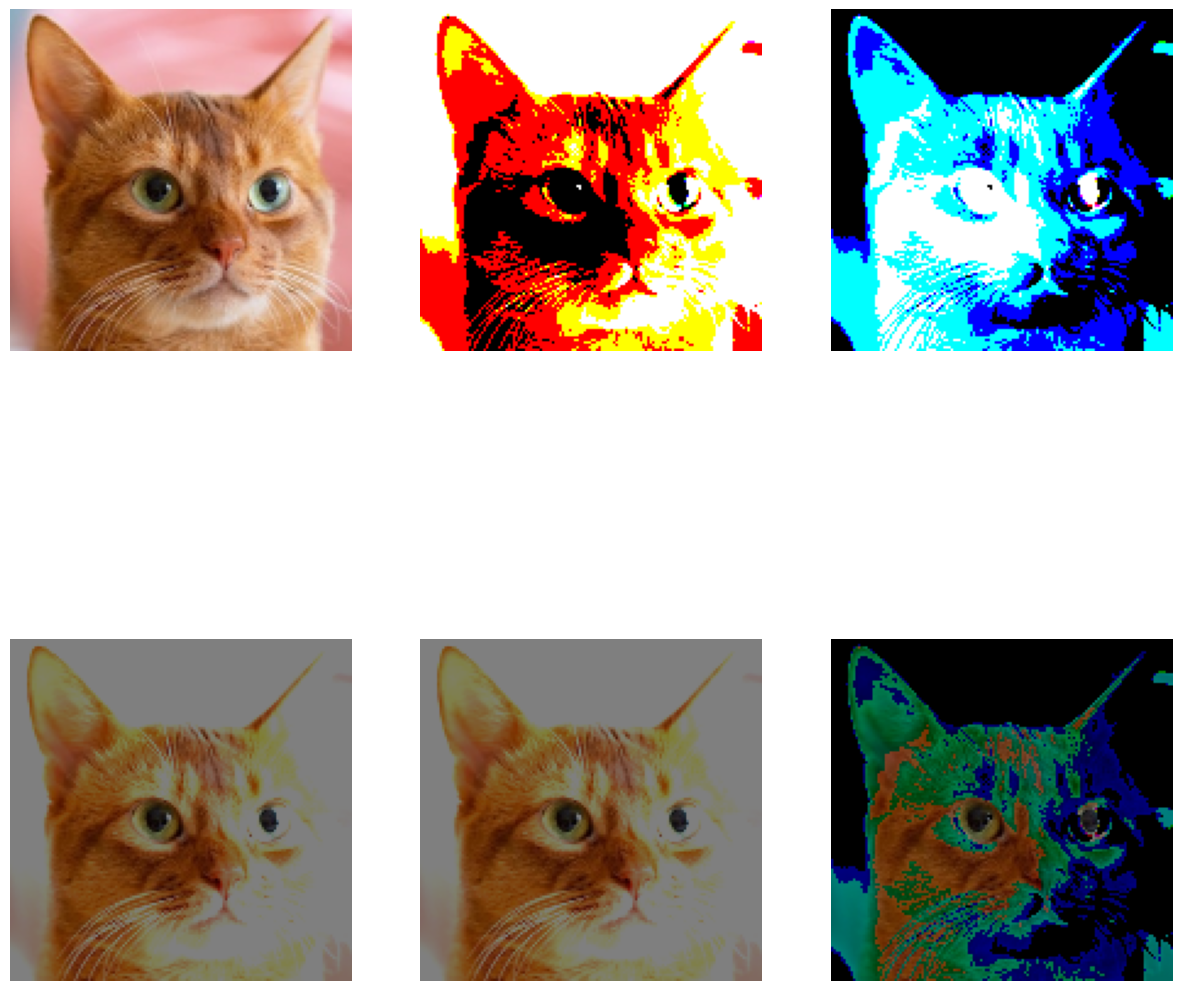

In [13]:
import cv2
#Image thresholding
ret, thresh1 = cv2.threshold(cropped,127,255,cv2.THRESH_BINARY)
#This applies a binary thresholding operation
#All pixel values greater than or equal to 127 are set to 255 (white)
#,and all pixel valuesless than 127 are set to 0 (black)

ret, thresh2 = cv2.threshold(cropped,127,255,cv2.THRESH_BINARY_INV)
#this is an inverse of the prev operation
#All pixel values greater than or equal to 127 are set to 0 (black),
#and all pixel values less than 127 are set to 255 (white)

ret, thresh3 = cv2.threshold(cropped,127,255,cv2.THRESH_TRUNC)
#this truncates pixel values greater than or equal to 127 to 127
#pixel values less than 127 remain unchanged
ret, thresh4 = cv2.threshold(cropped,127,255,cv2.THRESH_TRUNC)
#This keeps pixel values greater than or equal to 127 unchanged,
#and sets pixel values less than 127 to 0 (black)
ret, thresh5 = cv2.threshold(cropped,127,255,cv2.THRESH_TOZERO_INV)
fig,ax=plt.subplots(2,3)
ax[0][0].imshow(cropped)
ax[0][1].imshow(thresh1)
ax[0][2].imshow(thresh2)
ax[1][0].imshow(thresh3)
ax[1][1].imshow(thresh4)
ax[1][2].imshow(thresh5)

for ax in ax.ravel():
    ax.set_axis_off()
plt.show()